# First runs with different river classification systems for testing

Just for year 2002

May, 2019

In [8]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
from pylab import *
import matplotlib
import warnings
import pickle
warnings.filterwarnings("ignore")
import matplotlib.animation as animation
from matplotlib import rc

%matplotlib notebook

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

| Run ID    | River forcing file               |
|-----------|----------------------------------|
| riv_2a    | river_input-glacier-enhanced.nc  |
| riv_2b    | river_input-decrease-case.nc     |
| riv_2c    | river_input-increase-case.nc     |
| mn_test1f | river_input-base-case.nc         |

In [2]:
run_folder1= '/data/brogalla/run_storage/riv_2a/'
# run_folder2= '/data/brogalla/run_storage/riv_2b/'
# run_folder3= '/data/brogalla/run_storage/riv_2c/'
run_folder4= '/data/brogalla/run_storage/mn_test1f/'
monthly_ave  = 'ANHA12_EXH006_2002_monthly.nc'
monthly_diff = 'ANHA12_EXH006_2002_monthly_diff.nc'
# fday_test = 'ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020804-20020808.nc'

Mask land values

In [3]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[0,:,1480:2050,200:800]
tmask_full_ave     = np.zeros((12, 50, 570, 600))
tmask_full_ave[:]  = tmask

In [4]:
def load_monthly(storage, ave=monthly_ave, mask_ave=tmask_full_ave, diff=False):
    
    test_ave  = nc.Dataset(storage+ave)
    dmn_ave   = np.array(test_ave.variables['dissolmn'])
    omn_ave   = np.array(test_ave.variables['oxidismn'])
    
    #apply land mask
    if diff:
        mask_new = mask_ave[0:11,:,:,:]
        cond_ave  = (mask_new  < 0.1)
    else:
        cond_ave  = (mask_ave  < 0.1)
        
    dmn_mave  = np.ma.masked_where(cond_ave, dmn_ave[:,0,:,:,:]) 
    omn_mave  = np.ma.masked_where(cond_ave, omn_ave[:,0,:,:,:]) 
    
    return dmn_mave*1e9, omn_mave*1e9

In [5]:
riv_2a_dmn_ave, riv_2a_omn_ave   = load_monthly(run_folder1)
riv_2a_dmn_diff, riv_2a_omn_diff = load_monthly(run_folder1, ave=monthly_diff, diff=True)
t1f_dmn_ave, t1f_omn_ave         = load_monthly(run_folder4)
t1f_dmn_diff, t1f_omn_diff       = load_monthly(run_folder4, ave=monthly_diff, diff=True)

In [6]:
print(np.amax(riv_2a_dmn_ave), np.amin(riv_2a_dmn_ave), np.average(riv_2a_dmn_ave))
print(np.amax(riv_2a_dmn_diff), np.amin(riv_2a_dmn_diff), np.average(riv_2a_dmn_diff))
print(np.amax(t1f_dmn_ave), np.amin(t1f_dmn_ave), np.average(t1f_dmn_ave))
print(np.amax(t1f_dmn_diff), np.amin(t1f_dmn_diff), np.average(t1f_dmn_diff))

47.494675 0.0 3.464404600873498
36.72693 -35.139763 0.19741234569949734
175.03456 0.0 3.763112928488637
133.81293 -138.90862 0.24511638451443754


Load the lons, lats, etc.

In [9]:
ref   = nc.Dataset(run_folder4+monthly_ave)
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

Load map projection

<IPython.core.display.Javascript object>


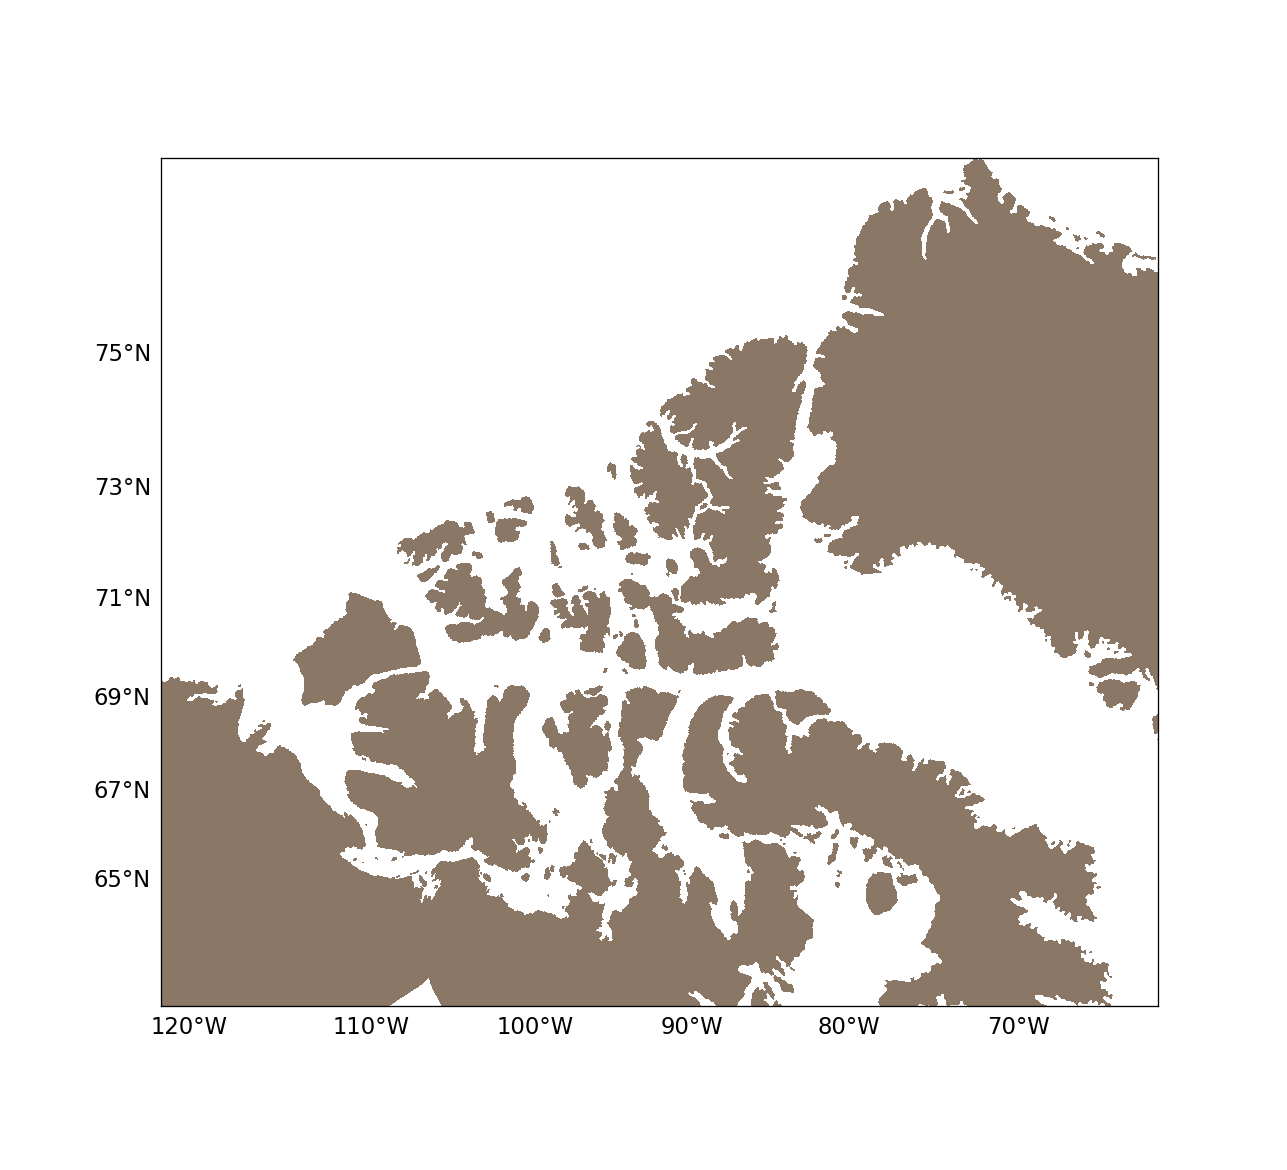

In [10]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

In [11]:
def months_overview(var, title, levels, min_v, max_v, proj=proj, ave=True):
    ax   = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn_subplotsax.pickle','rb'))
    
    x, y = proj(lons, lats)
    colour=cmocean.cm.balance
    cbar  = proj.contourf(x, y, var[0, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,0])
    proj.contourf(x, y, var[1, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,1])
    proj.contourf(x, y, var[2, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,2])
    proj.contourf(x, y, var[3, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[0,3])
    proj.contourf(x, y, var[4, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,0])
    proj.contourf(x, y, var[5, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,1])
    proj.contourf(x, y, var[6, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,2])
    proj.contourf(x, y, var[7, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[1,3])
    proj.contourf(x, y, var[8, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,0])
    proj.contourf(x, y, var[9, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,1])
    proj.contourf(x, y, var[10, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,2])
    if ave:
        proj.contourf(x, y, var[11, 0,:,:], levels, vmin=min_v, vmax=max_v, cmap=colour, ax=ax[2,3])
    
    # figure out how to add to a different set of axes
    #plt.colorbar(jan, ax=ax[0,0])
    
    ax[0,0].set_title('January')
    ax[0,1].set_title('February')
    ax[0,2].set_title('March')
    ax[0,3].set_title('April')
    ax[1,0].set_title('May')
    ax[1,1].set_title('June')
    ax[1,2].set_title('July')
    ax[1,3].set_title('August')
    ax[2,0].set_title('September')
    ax[2,1].set_title('October')
    ax[2,2].set_title('November')
    ax[2,3].set_title('December')
    
    fig = gcf()
    fig.suptitle(title)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
    fig.colorbar(cbar, cax=cbar_ax)

    return

## Glacial river trace metal concentrations enhanced:

Does a 50% increase in trace metal concentrations flowing out of glacial rivers have a strong impact on the Mn signatures in the CAA? To answer this question: compare outputs from riv_2a and mn_test1f runs.

<IPython.core.display.Javascript object>


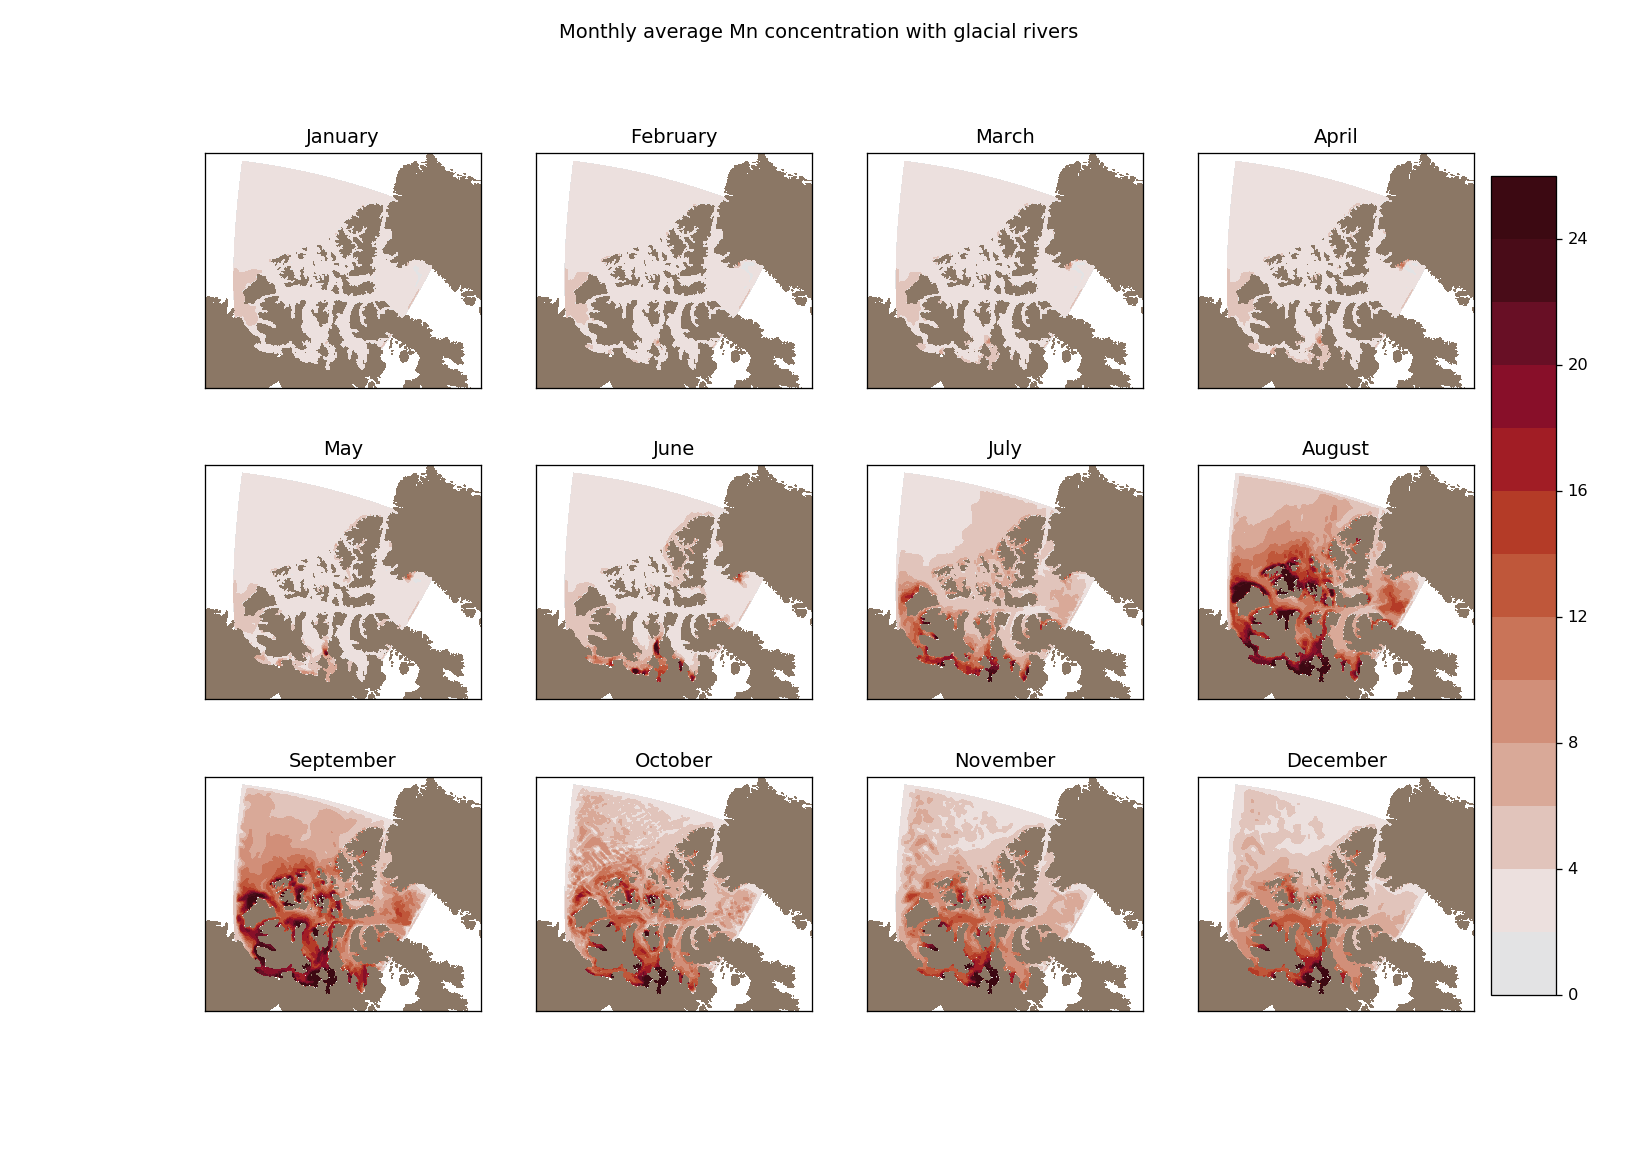

In [14]:
levels_ave = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 50]
vmin  = -20
vmax  = 24
months_overview(riv_2a_dmn_ave, 'Monthly average Mn concentration with glacial rivers', levels_ave, vmin, vmax)

<IPython.core.display.Javascript object>


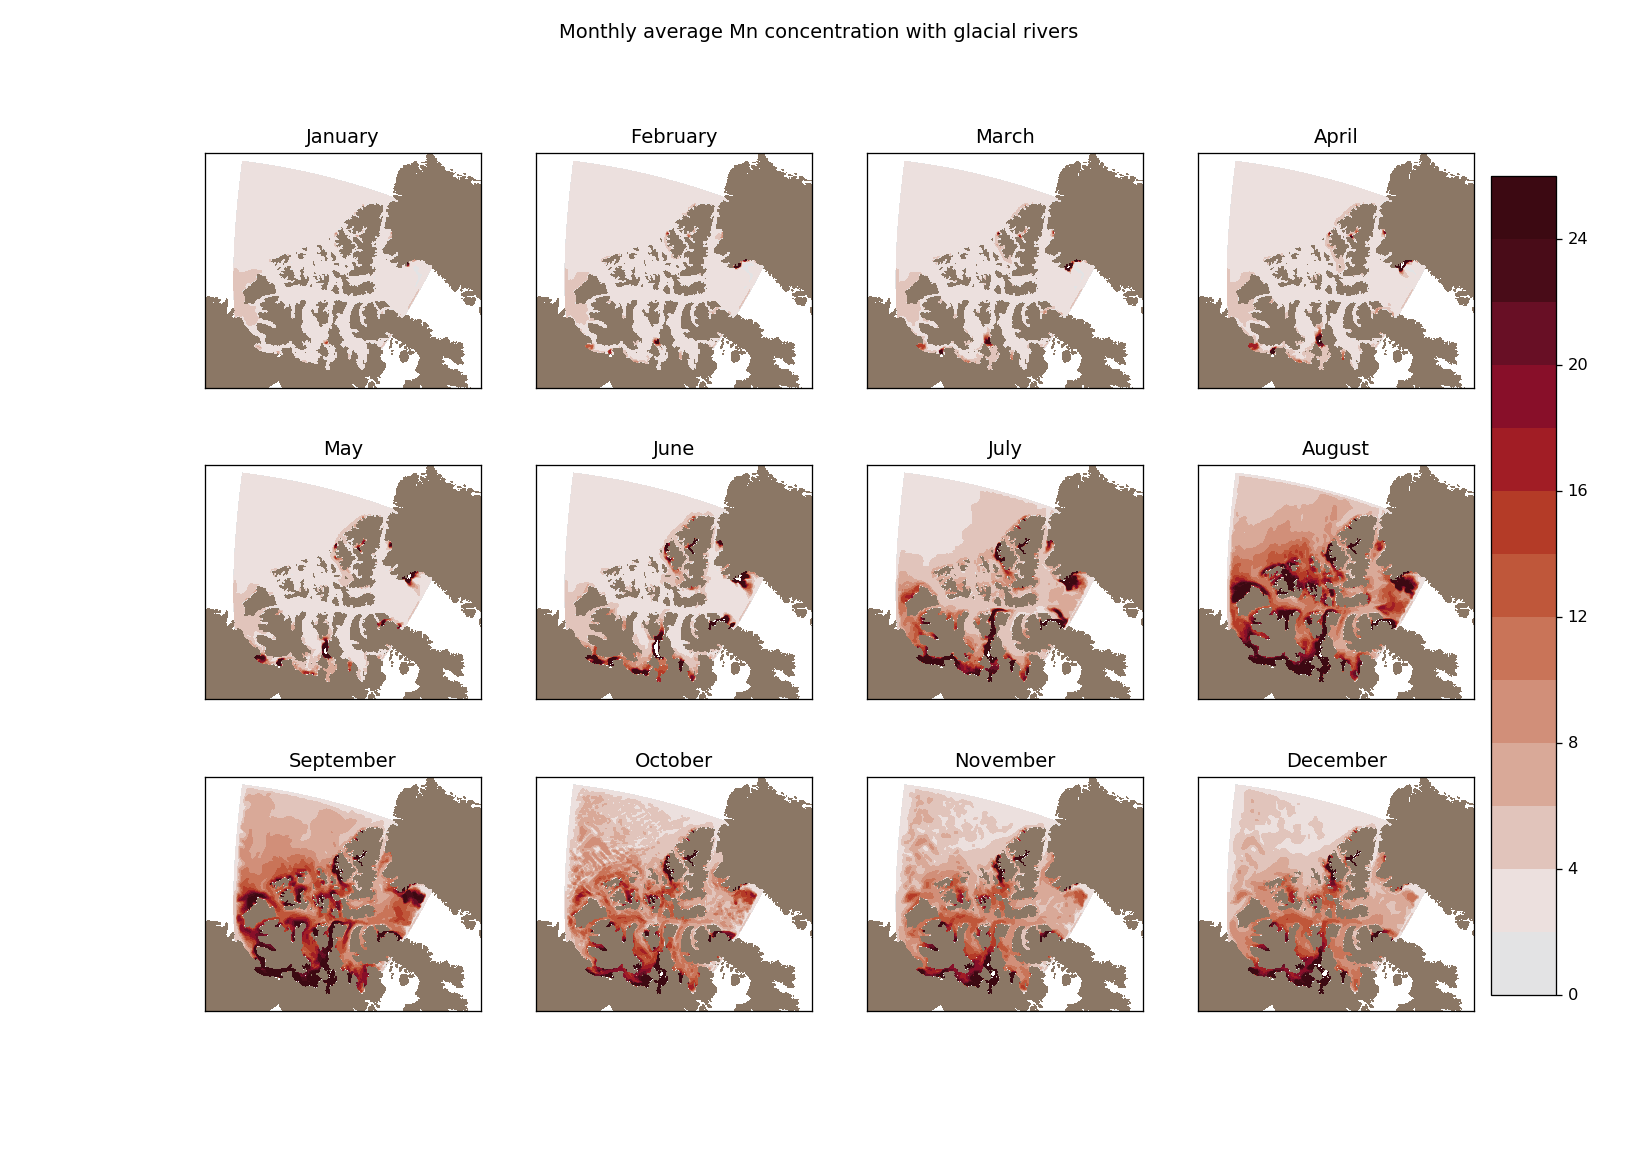

In [15]:
levels_ave = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 50]
vmin  = -20
vmax  = 24
months_overview(t1f_dmn_ave, 'Monthly average Mn concentration with glacial rivers', levels_ave, vmin, vmax)

In [12]:
glacial_dmn = riv_2a_dmn_ave - t1f_dmn_ave
glacial_omn = riv_2a_omn_ave - t1f_omn_ave

In [17]:
print(np.amax(glacial_dmn[:,:,:,:]), np.amin(glacial_dmn[:,:,:,:]), np.average(glacial_dmn[:,:,:,:]))

0.9251604 -155.59334 -0.2987113235456284


<IPython.core.display.Javascript object>


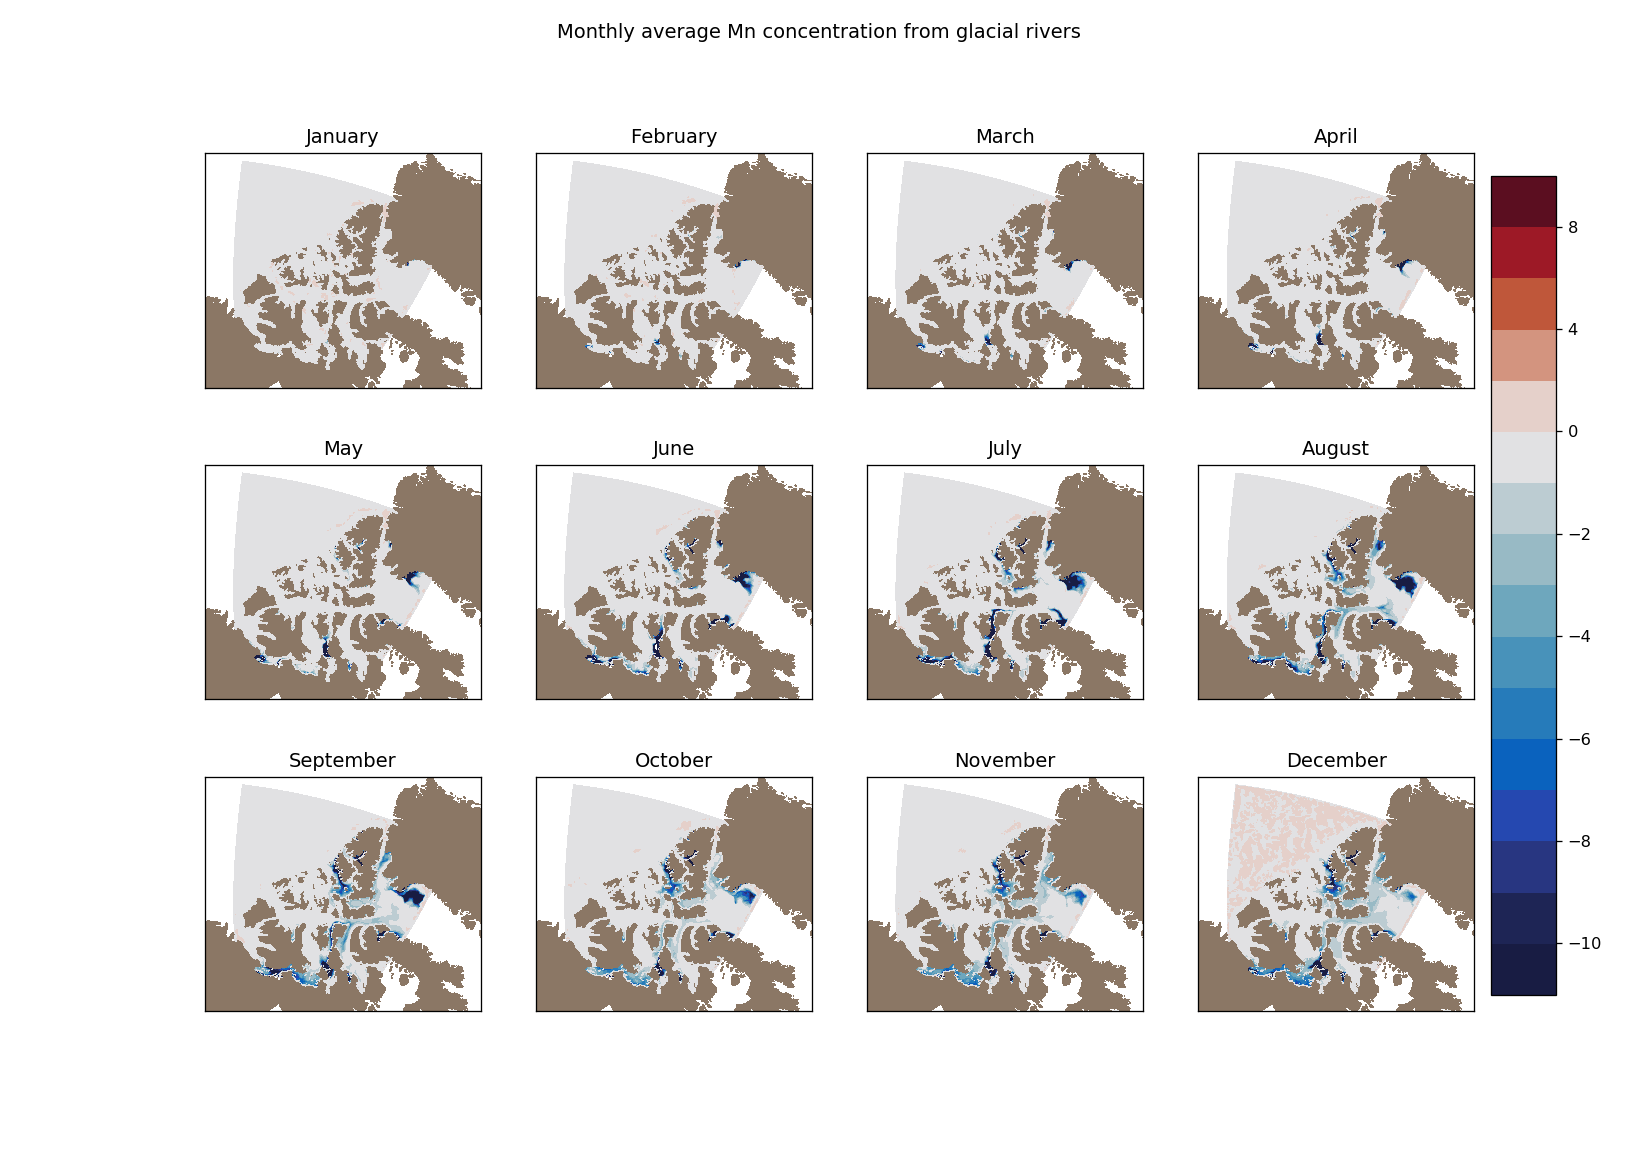

In [18]:
levels_ave = [-100, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 2, 4, 6, 8, 10]
vmin  = -10
vmax  = 10
months_overview(glacial_dmn, 'Monthly average Mn concentration from glacial rivers', levels_ave, vmin, vmax)

Month-to-month difference:

In [13]:
glacial_dmn_diff = riv_2a_dmn_diff - t1f_dmn_diff
glacial_omn_diff = riv_2a_omn_diff - t1f_omn_diff

In [14]:
glacial_dmtm = np.zeros((11,50,570,600))
for i in range(0,10):
    glacial_dmtm[i,:,:,:] = glacial_dmn[i+1,:,:,:] - glacial_dmn[i,:,:,:]

In [15]:
cond_ave  = (tmask_full_ave[0:11,:,:,:]  < 0.1)
glacial_dmtmm  = np.ma.masked_where(cond_ave, glacial_dmtm[:,:,:,:])

<IPython.core.display.Javascript object>


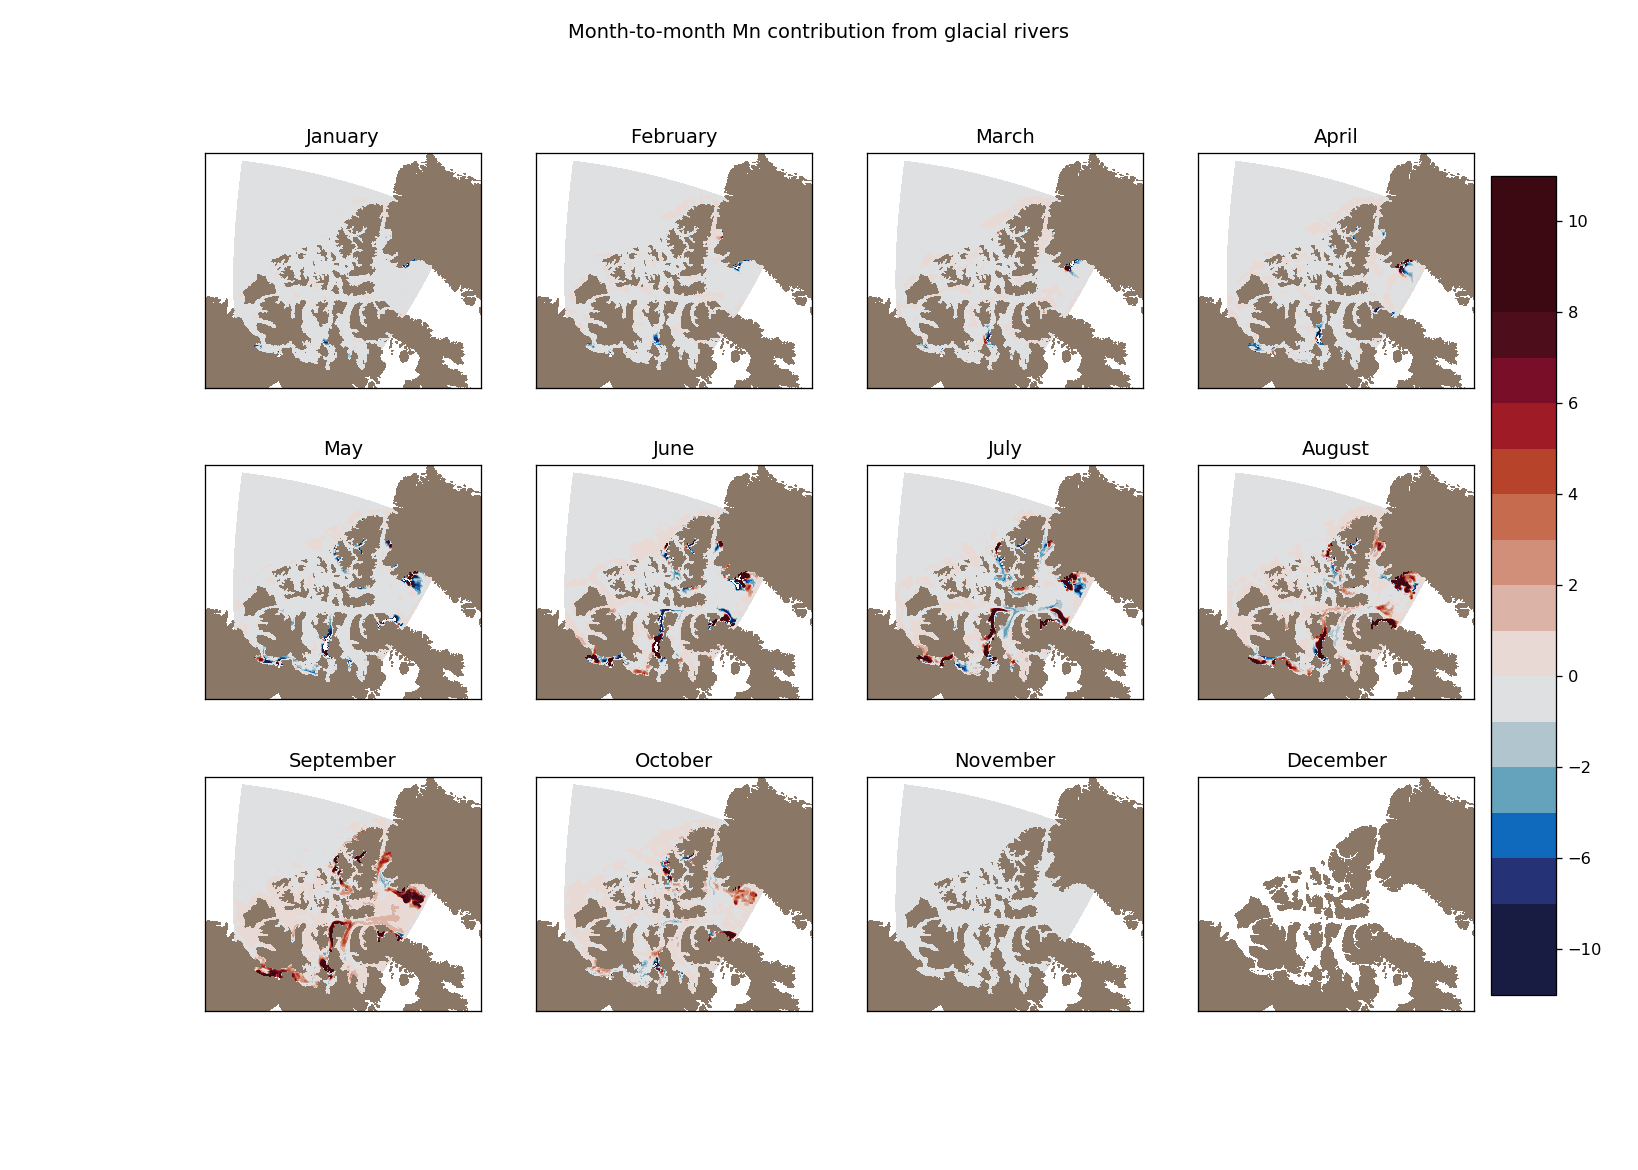

In [22]:
levels_diff = [-19, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
months_overview(glacial_dmtmm, 'Month-to-month Mn contribution from glacial rivers', levels_diff, vmin, vmax, ave=False)

<IPython.core.display.Javascript object>


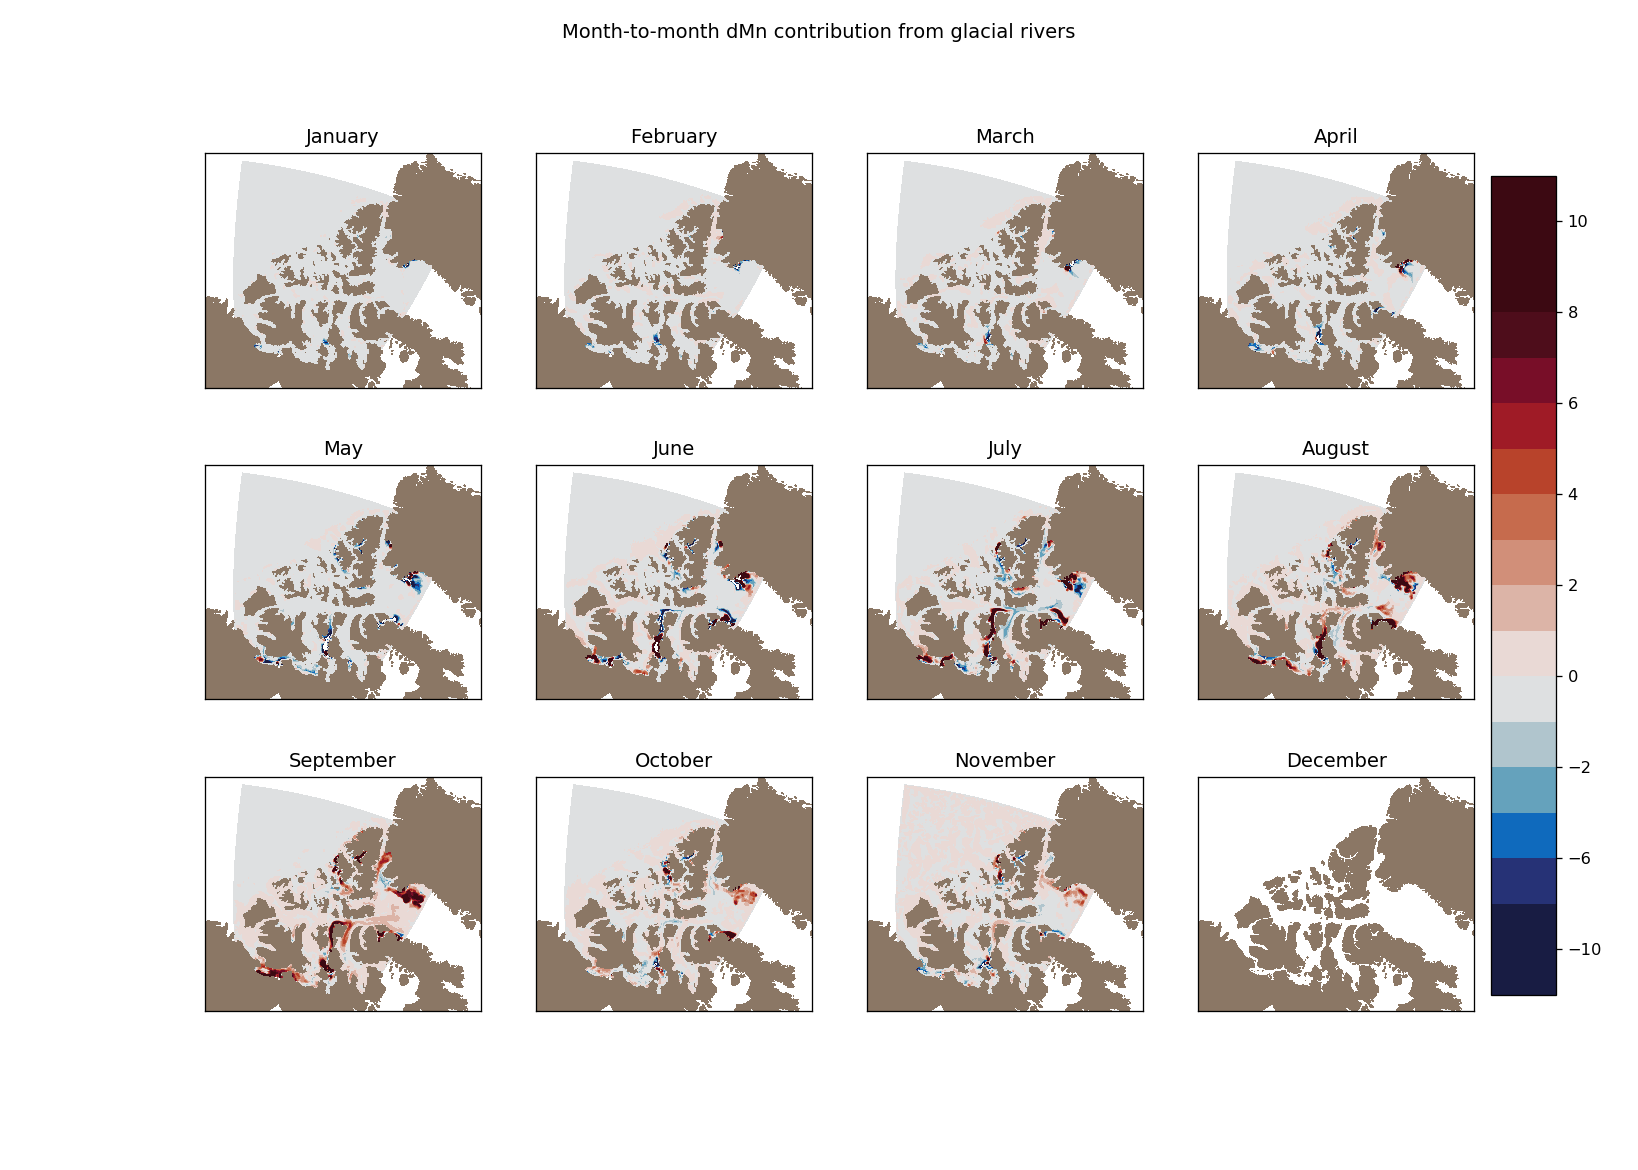

In [23]:
levels_diff = [-19, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
months_overview(glacial_dmn_diff, 'Month-to-month dMn contribution from glacial rivers', levels_diff, vmin, vmax, ave=False)

<IPython.core.display.Javascript object>


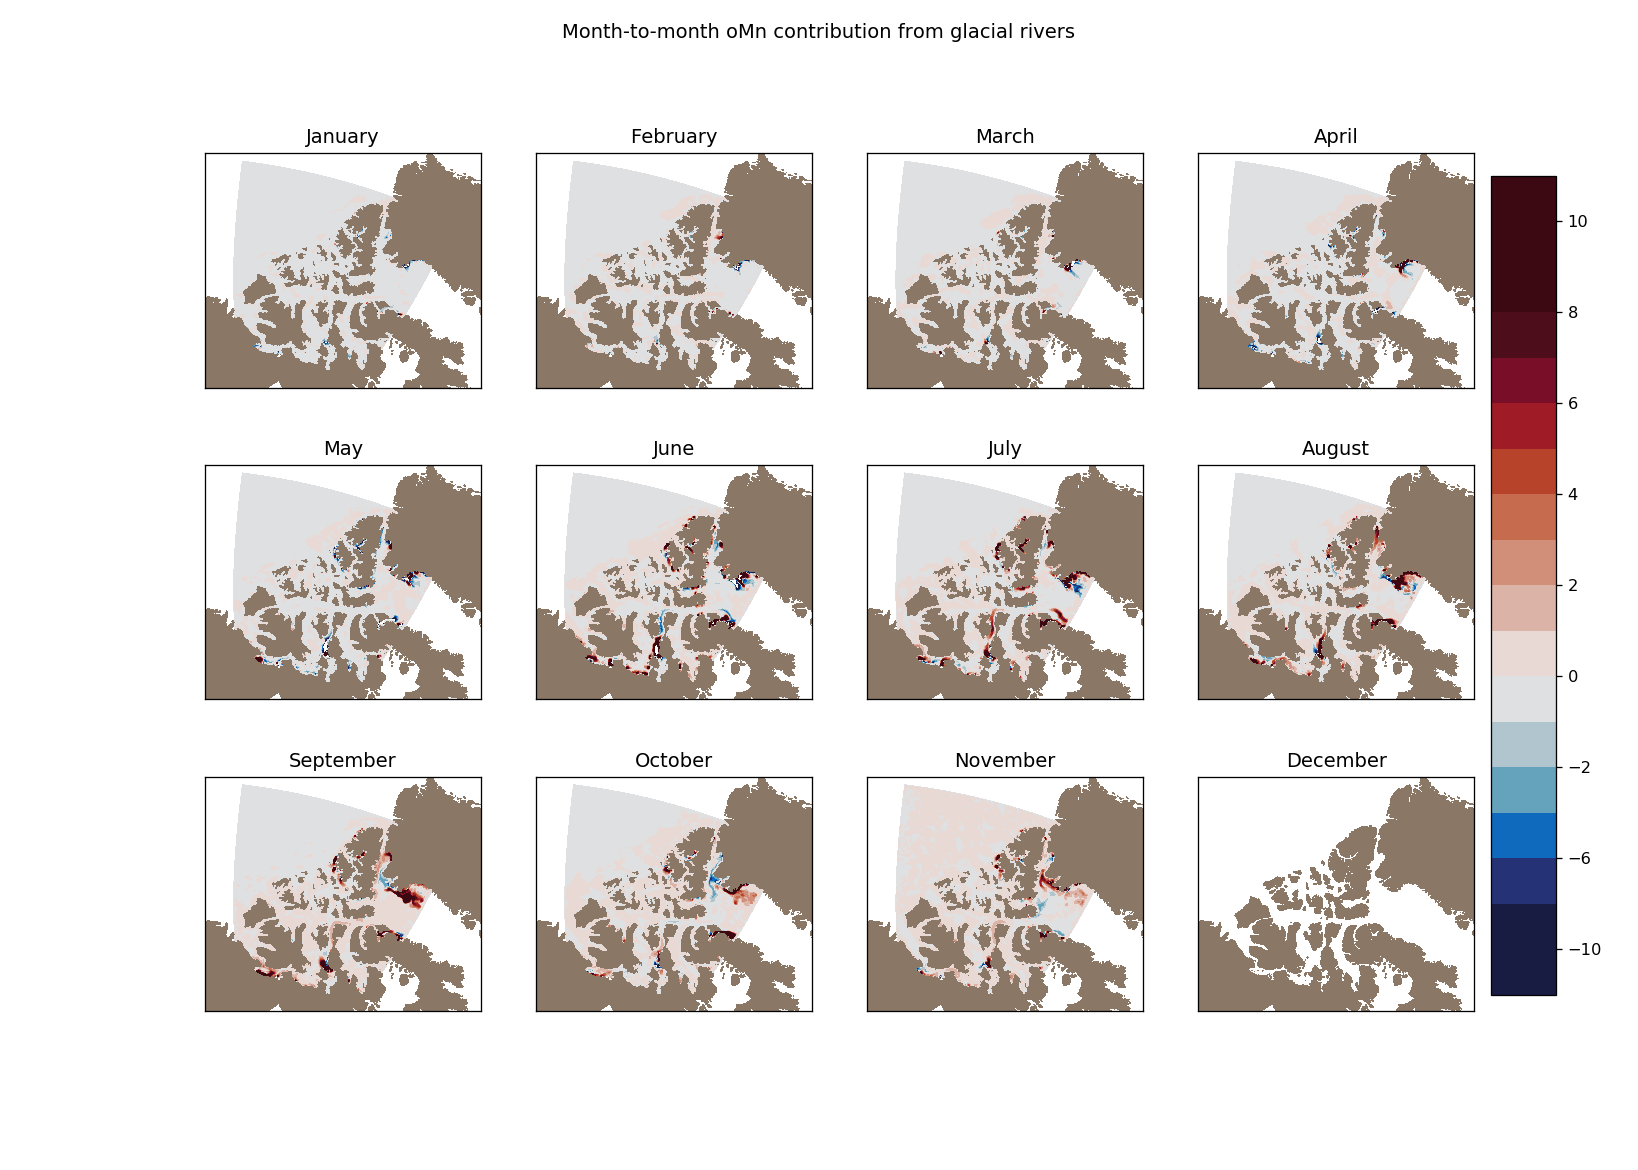

In [27]:
levels_diff = [-19, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
months_overview(glacial_omn_diff, 'Month-to-month oMn contribution from glacial rivers', levels_diff, vmin, vmax, ave=False)

# look in more detail:

In [28]:
print(np.amax(glacial_dmn_diff[0,0,:,:]), np.amin(glacial_dmn_diff[0,0,:,:]), np.average(glacial_dmn_diff[0,0,:,:]))

1.2234279 -52.50571 -0.0843880276720063


<IPython.core.display.Javascript object>


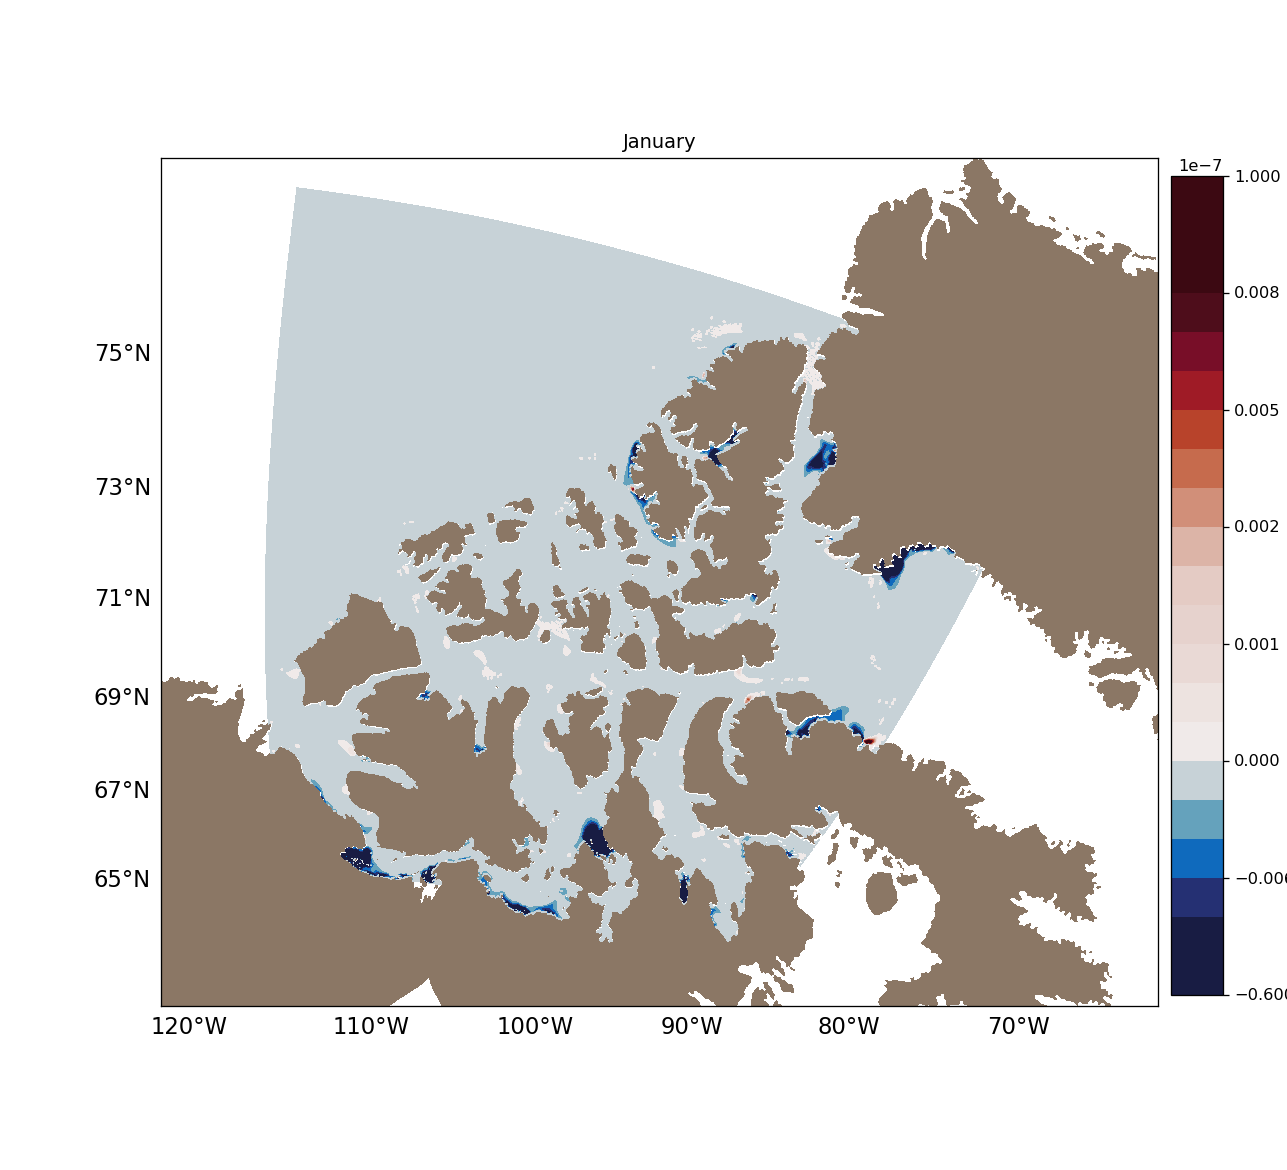

In [36]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_ave = [-6e-8, -1e-9, -8e-10, -6e-10, -4e-10, -2e-10, 0, 2e-11, 4e-11, 6e-11, 8e-11, \
              1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10, 1e-9, 1e-7]
vmin  = -8e-10
vmax  = 8e-10
cbar = proj.contourf(x, y, glacial_dmn_diff[0,0,:,:]*10**-9, levels_ave, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('January')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


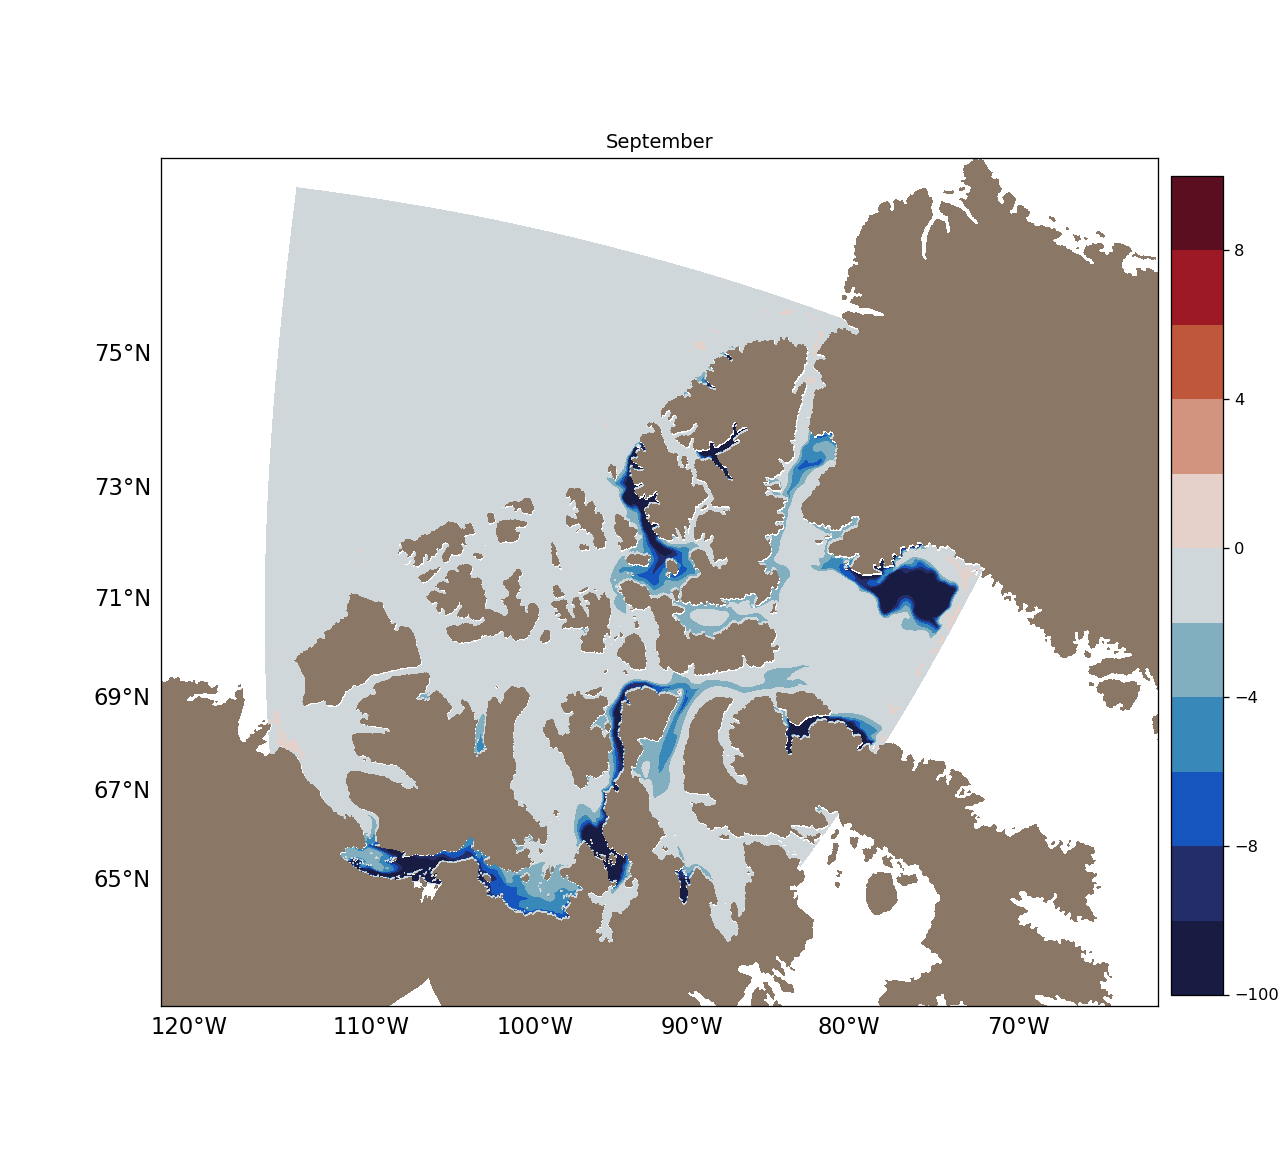

In [17]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_ave = [-100, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
vmin  = -10
vmax  = 10
cbar = proj.contourf(x, y, glacial_dmn[8,0,:,:], levels_ave, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('September')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


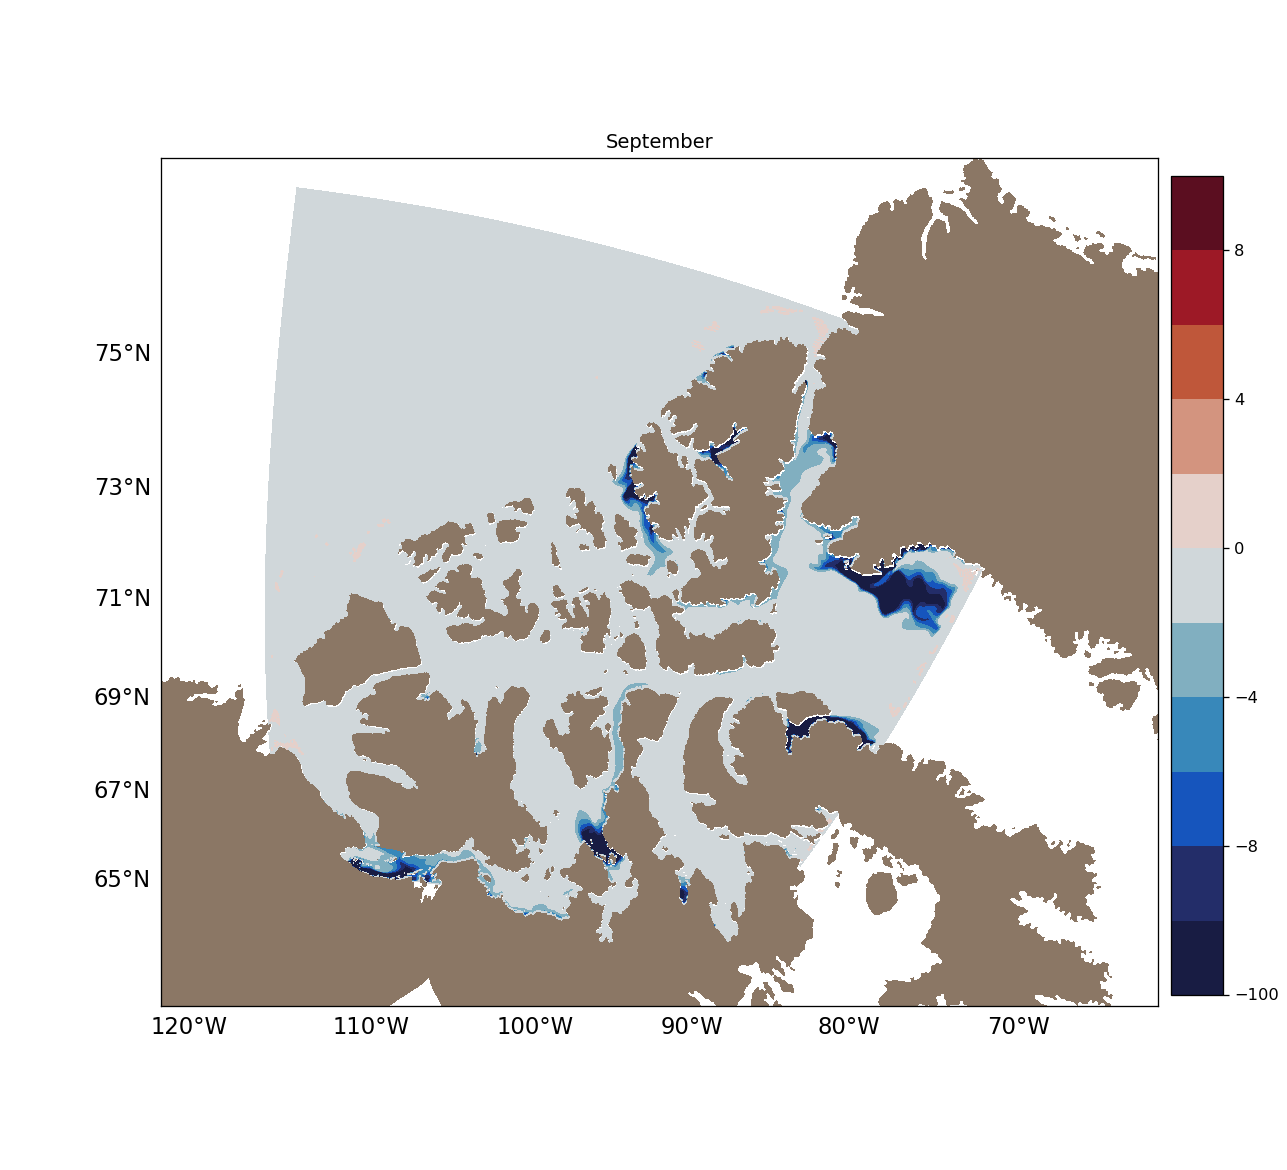

In [32]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_ave = [-100, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
vmin  = -10
vmax  = 10
cbar = proj.contourf(x, y, glacial_omn[8,0,:,:], levels_ave, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('September')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


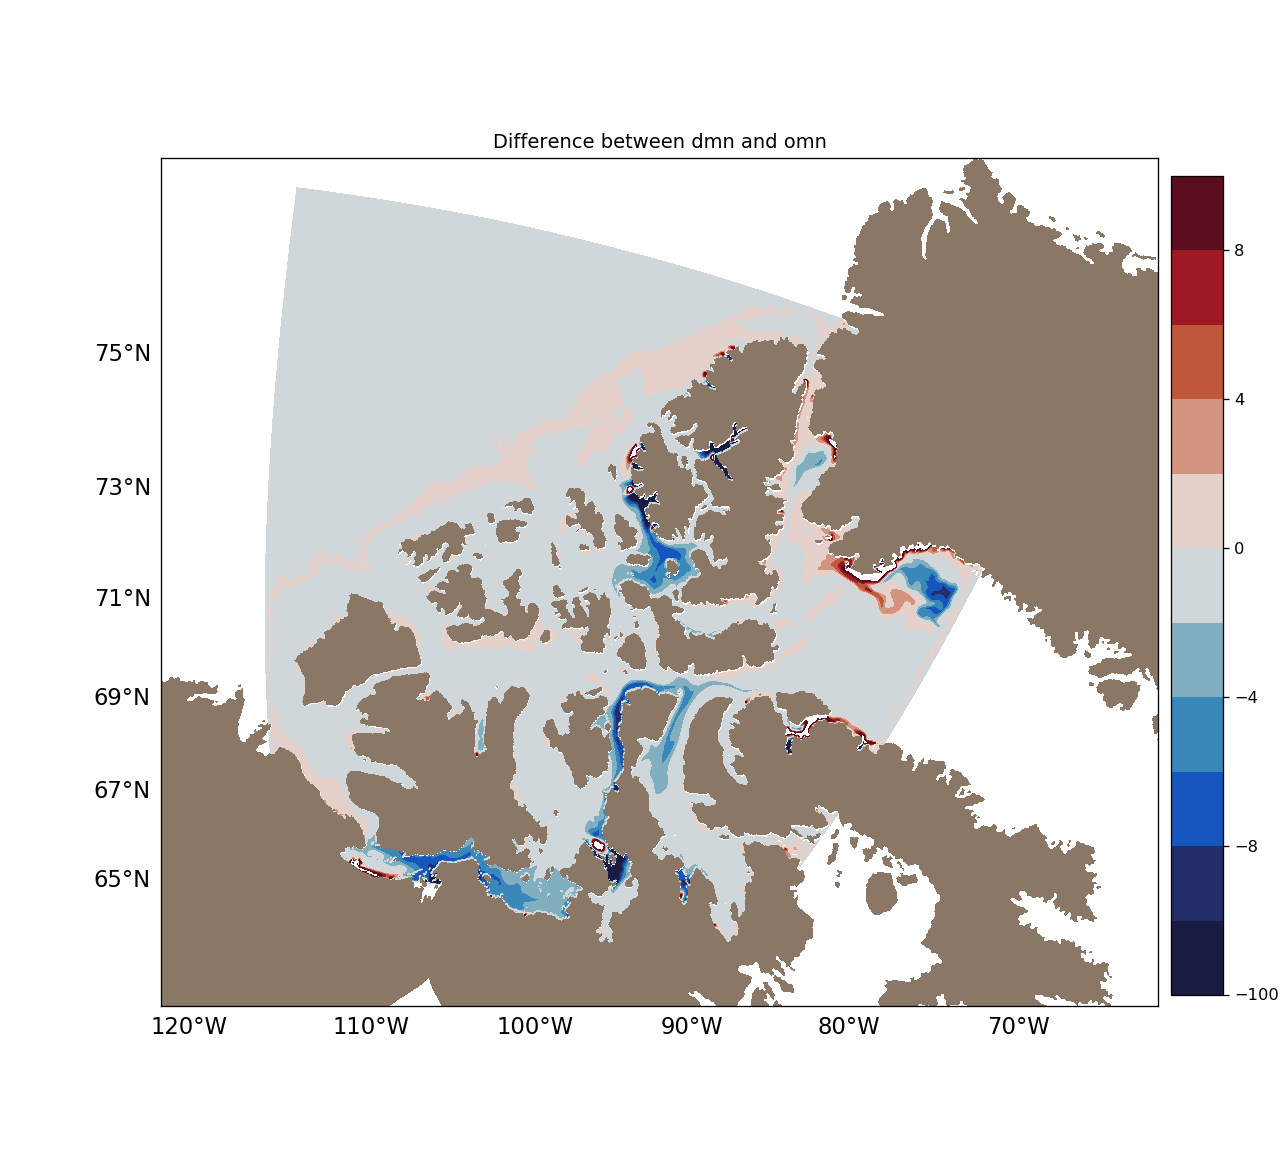

In [36]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_ave = [-100, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
vmin  = -10
vmax  = 10
plot_var = glacial_dmn[8,0,:,:] - glacial_omn[8,0,:,:]
cbar = proj.contourf(x, y, plot_var, levels_ave, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('Difference between dmn and omn')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

# month-to-month difference:

<IPython.core.display.Javascript object>


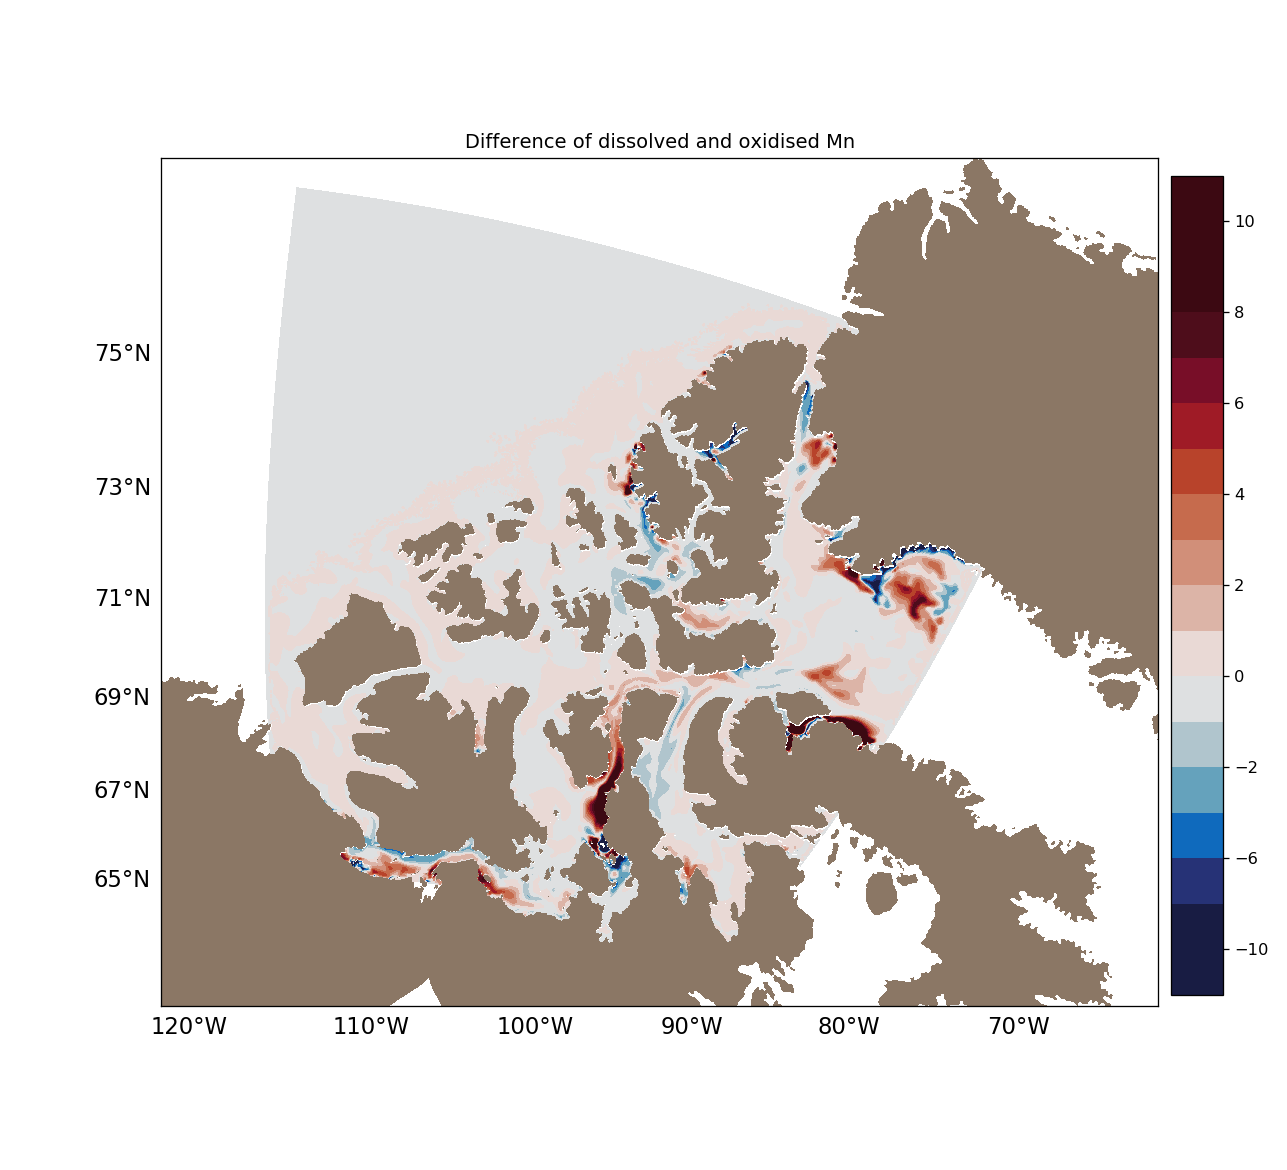

In [38]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-30, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
var_plot = glacial_dmn_diff[7,0,:,:] - glacial_omn_diff[7,0,:,:]
cbar = proj.contourf(x, y, var_plot, levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('Difference of dissolved and oxidised Mn')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


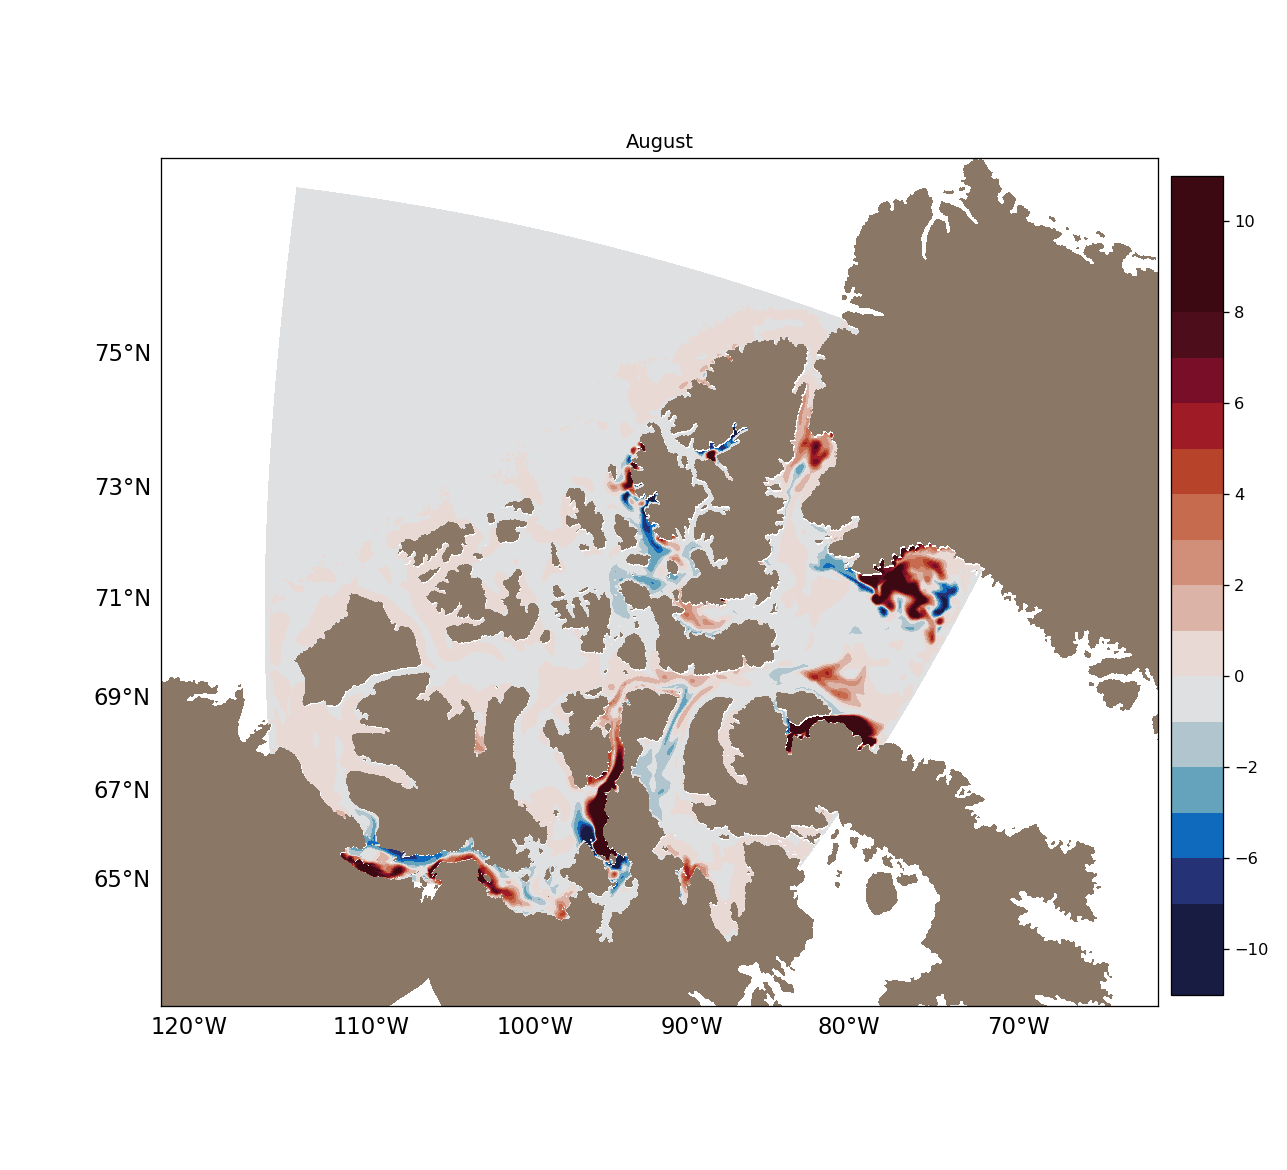

In [26]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-30, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
cbar = proj.contourf(x, y, glacial_dmn_diff[7,0,:,:], levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('August')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


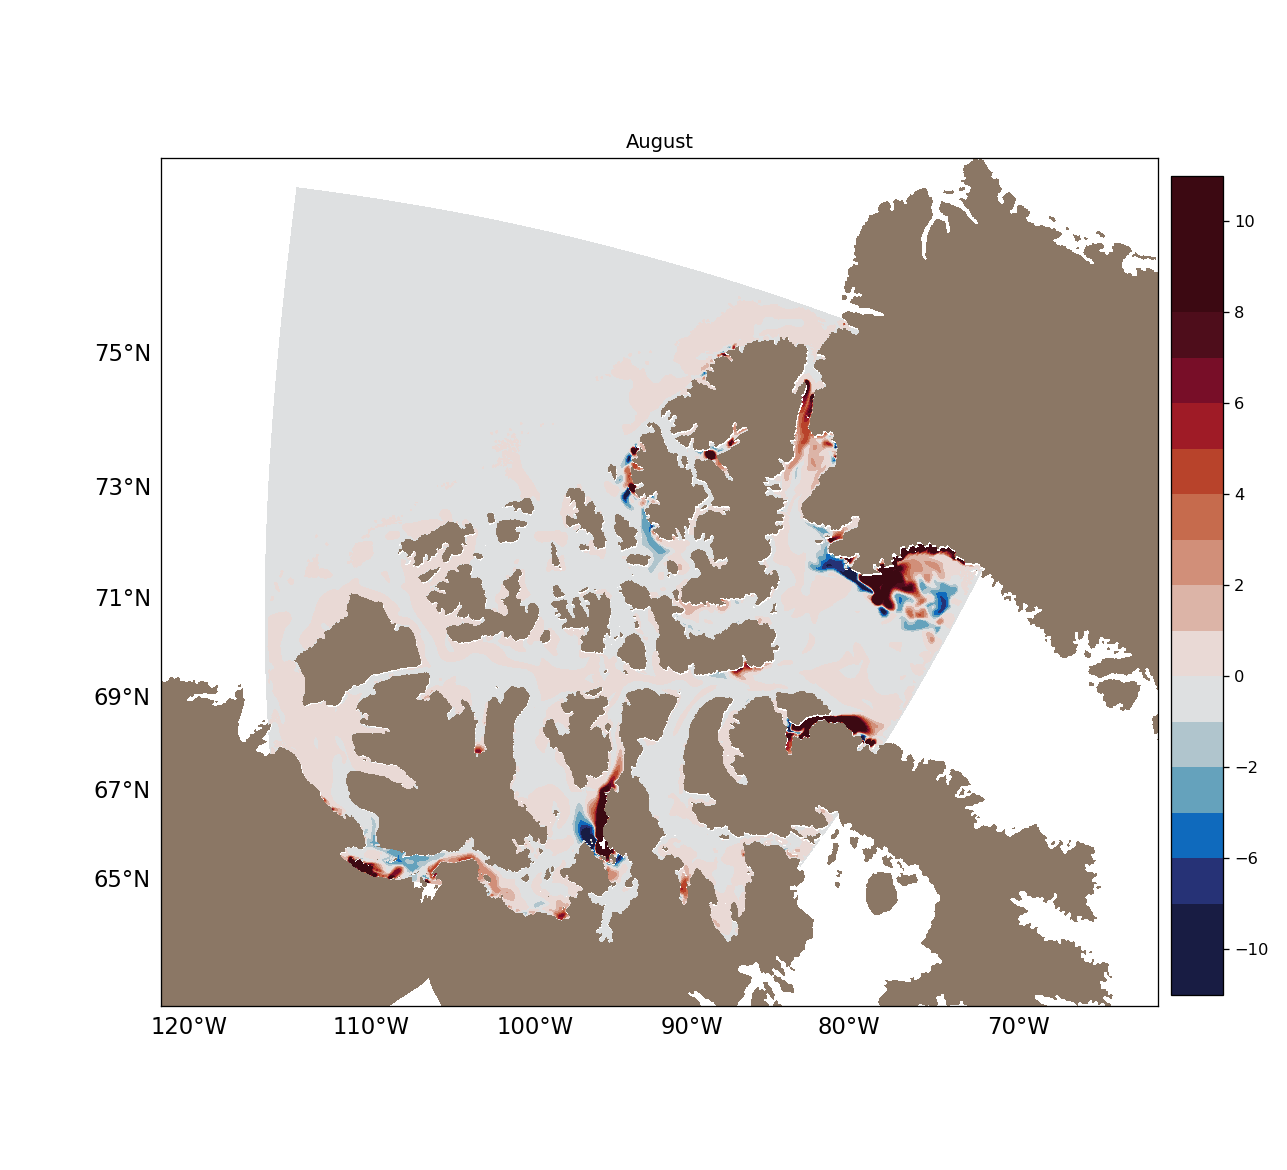

In [27]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-30, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
cbar = proj.contourf(x, y, glacial_omn_diff[7,0,:,:], levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('August')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

In [ ]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-30, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
cbar = proj.contourf(x, y, glacial_mn_diff[7,0,:,:], levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('August')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

In [ ]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-30, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
cbar = proj.contourf(x, y, glacial_mn_diff[8,0,:,:], levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('September')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

In [ ]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

levels_diff = [-30, -10, -8, -6, -4, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 43]
vmin  = -8
vmax  = 8
cbar = proj.contourf(x, y, glacial_mn_diff[9,0,:,:], levels_diff, vmin=vmin, vmax=vmax, cmap=colour)
plt.title('October')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);